In [35]:
import requests
from urllib.request import urlopen
from urllib.parse import urlencode,unquote,quote_plus
import urllib
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
#from konlpy.tag import Okt

# 안전보건법령 간

In [36]:
df_industrial = pd.read_excel("산업안전보건법.xlsx")
df_erection = pd.read_excel("건설기술진흥법.xlsx")
df_danger = pd.read_excel("위험물안전관리법.xlsx")
df_electric = pd.read_excel("전기안전관리법.xlsx")
df_chemistry = pd.read_excel("화학물질관리법.xlsx")
df_info = pd.DataFrame()
df_info = df_info.append(df_industrial,ignore_index = True)
df_info = df_info.append(df_erection,ignore_index = True)
df_info = df_info.append(df_danger,ignore_index = True)
df_info = df_info.append(df_electric,ignore_index = True)
df_info = df_info.append(df_chemistry,ignore_index = True)
df_info

,키,조내용
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...
...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종..."


In [37]:
jo_key = [str(i) for i in df_info.get('키')]
df_info['키'] = jo_key
jo_key

['10011',
 '20011',
 '30011',
 '40011',
 '50011',
 '60011',
 '70011',
 '80011',
 '90011',
 '100011',
 '110011',
 '120011',
 '130011',
 '140011',
 '150011',
 '160011',
 '170011',
 '180011',
 '190011',
 '200011',
 '210011',
 '220011',
 '230011',
 '240011',
 '250011',
 '260011',
 '270011',
 '280011',
 '290011',
 '300011',
 '310011',
 '320011',
 '330011',
 '340011',
 '350011',
 '360011',
 '370011',
 '380011',
 '390011',
 '400011',
 '410011',
 '420011',
 '430011',
 '440011',
 '450011',
 '460011',
 '470011',
 '480011',
 '490011',
 '500011',
 '510011',
 '520011',
 '530011',
 '540011',
 '550011',
 '560011',
 '570011',
 '580011',
 '590011',
 '600011',
 '610011',
 '620011',
 '630011',
 '640011',
 '650011',
 '660011',
 '670011',
 '680011',
 '690011',
 '700011',
 '710011',
 '720011',
 '730011',
 '740011',
 '750011',
 '760011',
 '770011',
 '780011',
 '790011',
 '800011',
 '810011',
 '820011',
 '830011',
 '840011',
 '850011',
 '860011',
 '870011',
 '880011',
 '890011',
 '900011',
 '910011',
 '920011

In [38]:
stop_words_df = pd.read_excel("stopwords.xlsx")
stop_words_df

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
694,따른
695,필요한
696,등을
697,해당하는


In [39]:
# okt = Okt()
# tokenized_data = []
# for sentence in df_info['조내용']:
#     temp_X = okt.morphs(sentence, stem=True) # 토큰화
#     temp_X = [word for word in temp_X if not word in stop_words and len(word) > 1] # 불용어 제거
#     tokenized_data.append(temp_X)

In [40]:
from eunjeon import Mecab
tagger = Mecab()

In [179]:
posts = df_info.get('조내용')

def tokenizer(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    nouns = []
  
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words:
            nouns.append(noun)
    return nouns

tokenized_data = []

for sentence in posts:
    temp_X = tokenizer(sentence)
    tokenized_data.append(temp_X)
tokenized_data

[['목적',
  '법',
  '안전',
  '보건',
  '기준',
  '확립',
  '책임',
  '소재',
  '재해',
  '예방',
  '작업',
  '환경',
  '조성',
  '노무',
  '제공',
  '사람',
  '안전',
  '보건',
  '유지',
  '목적',
  '개정'],
 ['정의',
  '법',
  '사용',
  '용어',
  '뜻',
  '개정',
  '산업재',
  '노무',
  '제공',
  '사람',
  '업무',
  '관계',
  '건설물',
  '작업',
  '밖',
  '업무',
  '사망',
  '부상',
  '질병',
  '말',
  '중대',
  '재해',
  '재해',
  '중',
  '사망',
  '재해',
  '정도',
  '재해자',
  '발생',
  '고용',
  '노동',
  '부령',
  '재해',
  '말',
  '근로자',
  '란',
  '근로',
  '기준',
  '법',
  '조제',
  '근로자',
  '말',
  '사업주',
  '근로자',
  '사용',
  '사업',
  '말',
  '근로자',
  '대표',
  '근로자',
  '과반수',
  '조직',
  '노동조합',
  '노동조합',
  '근로자',
  '과반수',
  '조직',
  '노동조합',
  '근로자',
  '과반수',
  '대표',
  '말',
  '도급',
  '명칭',
  '물건',
  '제조',
  '서비스',
  '제공',
  '밖',
  '업무',
  '계약',
  '말',
  '도급인',
  '물건',
  '제조',
  '서비스',
  '제공',
  '밖',
  '업무',
  '도급',
  '사업주',
  '말',
  '건설',
  '공사',
  '발주자',
  '제외',
  '수급인',
  '도급인',
  '물건',
  '제조',
  '서비스',
  '제공',
  '밖',
  '업무',
  '도급',
  '사업주',
  '말',
  '관계',
  '수급인',
  '도급',
  '단계',
  '체결',
  '

조문의 최대 길이 : 525
조문의 평균 길이 : 78.43326039387308


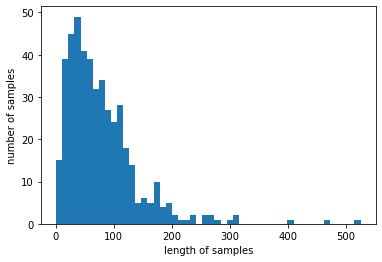

In [42]:
print('조문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('조문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [43]:
df_info['Token'] = tokenized_data
df_info

,키,조내용,Token
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...,"[목적, 법, 안전, 보건, 기준, 확립, 책임, 소재, 재해, 예방, 작업, 환경..."
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...,"[정의, 법, 사용, 용어, 뜻, 개정, 산업재, 노무, 제공, 사람, 업무, 관계..."
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업...","[적용, 범위, 법, 사업, 적용, 유해, 위험, 정도, 사업, 종류, 사업장, 상..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...,"[정부, 책무, 정부, 법, 목적, 달성, 호의, 이행, 책무, 개정, 정부, 호의..."
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...,"[사업주, 의무, 사업주, 특수, 형태, 근로, 종사자, 노무, 제공, 물건, 수거..."
...,...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...,"[벌칙, 조제, 신고, 이하, 징역, 억, 원, 이하, 벌금]"
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...,"[벌칙, 이하, 징역, 천만, 원, 이하, 벌금, 개정, 조제, 허가, 조건, 이행..."
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...,"[벌칙, 개월, 이하, 징역, 만, 원, 이하, 벌금, 개정, 조제, 단서, 위반,..."
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종...","[양벌규정, 법인, 대표자, 법인, 개인, 대리인, 사용, 밖, 종업원, 법인, 개..."


In [44]:
for i in range(len(df_info)):
    if '삭제' in df_info.iloc[i][1][:10]:
        print(i)
        df_info.iloc[[i]] = ' '

220
431
432
433


In [45]:
df_info.isnull().sum()

키        0
조내용      0
Token    0
dtype: int64

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 컨텍스트 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.
- CBOW : 주변 단어를 통해 해당 단어를 예측
- Skip-gram : 해당 단어를 통해 주변 단어를 예측

In [150]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size=100, alpha=0.025, window = 5, min_count = 5, workers = 4, sg = 1)

In [151]:
model.wv.vectors.shape

(711, 100)

In [176]:
model.wv.most_similar('고용')

[('노동부', 0.9601417183876038),
 ('노동', 0.9378076791763306),
 ('신뢰', 0.8997943997383118),
 ('보존', 0.8894399404525757),
 ('작업장', 0.8890572190284729),
 ('제거', 0.886978805065155),
 ('농도', 0.8787626624107361),
 ('시기', 0.8711497783660889),
 ('심사', 0.8694495558738708),
 ('포장', 0.8686063289642334)]

In [171]:
model.wv.similarity('안전','근로')

0.5354376

In [ ]:
import pandas , nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

In [ ]:
# Great Input Data
# doc2vec 입력 형식에 맞게 데이터를 수정한다.
# tags = 문서 ID
# words = 단어 list

doc_df = df_info[['키','Token']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]
doc_df

# Training
파라메터 설명
- window: 모델 학습할때 앞뒤로 보는 단어의 수
- size: 벡터 차원의 크기
- alpha: learning rate
- min_count: 학습에 사용할 최소 단어 빈도 수
- dm: 학습방법 1 = PV-DM, 0 = PV-DBOW
- negative: Complexity Reduction 방법, negative sampling
- max_epochs: 최대 학습 횟수

In [ ]:
max_epochs = 50
vec_size = 100
model = Doc2Vec(
    window=5,
    vector_size=vec_size,
    alpha=0.025, 
    min_alpha=0.00025,
    min_count=5,
    dm =1,
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs
               )
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
# model.save('doc2vec_50epochs.model')
# print("Model Saved")

In [ ]:
# model = Doc2Vec.load('doc2vec_50epochs.model')

# 결과 확인
특정 문서와 유사한 문서를 찾기 위해서는 2단계를 거친다.
1. 문서의 vector화
2. 변환된 vector와 가장 가까운 vector 추출
* infer_vector 사용시 seed값을 주지 않으면 random한값이 seed로 사용되어 값이 계속 변경된다.
* 학습되지 않은 단어를 사용한 문서도 결과가 나온다.

https://hanshuginn.blogspot.com/2019/03/python-doc2vec.html

In [ ]:
def get_key(k) :
    if k[-1] == "1" :
        s = "OSH"+k[0:(len(k)-4)]
    elif k[-1]=="2":
        s = "CTP"+k[0:(len(k)-4)]
    elif k[-1]=="3":
        s = "HSM"+k[0:(len(k)-4)]
    elif k[-1]=="4":
        s = "ESM"+k[0:(len(k)-4)]
    elif k[-1]=="5":
        s = "CMM"+k[0:(len(k)-4)]  
    if k[-3] != "0":
        s += "의 "+k[-3]
    return s

In [ ]:
def get_law(law):
    if law == '산업안전보건법':
        num = '1'
    elif law == '건설기술진흥법':
        num = '2'
    elif law == '위험물안전관리법':
        num = '3'
    elif law == '전기안전관리법':
        num = '4'
    elif law == '화학물질관리법':
        num = '5'
    return num

In [ ]:
#model.random.seed(9999)

doc_list = input().split(' ')

# 특정 document를 입력받았을 때 그 document 단어와 유사도가 높은 조 순서대로 출력
print(doc_list)
inferred_vector = model.infer_vector(doc_list)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)

for rd in return_docs:
    for des in df_info[df_info['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1], '\n')
        print(des)
        print()

In [ ]:
len(inferred_vector)

In [ ]:
return_docs

In [ ]:
law = input('법을 입력하세요: ')
jo = input('조를 입력하세요: ')
if len(jo) > 2 and jo[-3] == '의':
    docs = jo + '0' + jo[-1] + '1'+ get_law(law)
else:    
    docs = jo + '001' + get_law(law)

print("조문키: ", docs)
print()

model.random.seed(9999)

for i in range(len(df_info)):
    if df_info.iloc[i][0] == docs:
        doc = df_info.iloc[i][2]
print(doc)
inferred_vector = model.infer_vector(doc)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)
for rd in return_docs:
    for des in df_info[df_info['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1])
        print(des, '\n')

In [ ]:
return_docs

In [ ]:
import openpyxl

In [ ]:
wb=openpyxl.Workbook()
w1=wb.create_sheet("산업안전보건법 내")
w2=wb.create_sheet("안전보건법령 간")



In [ ]:
num=0
w2.merge_cells("A1:K1")
w2["A1"].value="안전보건법령 간 count 기준"

for i in range(2,12):
    w2.cell(row=2, column=i).value=str(i-1)

rng = []
for i in df_info['키']:
    if i[-1] == '1':
        rng.append(i)
        
for idx, key in enumerate(df_info['키'][:len(rng)]):
    
    
    
    if key == ' ':
        w2.cell(row=idx+3, column=1).value='삭제된 조문'

    elif key[-1] == '1' and key[-3] != '0':
        w2.cell(row=idx+3, column=1).value='OSH' + key[:-4] + '의 ' + key[-3]
        doc = df_info.iloc[idx][2]
        
    elif key[-1] == '1':
        w2.cell(row=idx+3, column=1).value='OSH' + key[:-4]
        doc = df_info.iloc[idx][2]
    
    else:
        break
        
    inferred_vector = model.infer_vector(doc)
    return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)

    for rd in return_docs:
        for j in range(2,12):
            w2.cell(row=idx+3, column=j).value=get_key(return_docs[j-2][0])
            

In [ ]:
return_docs

In [ ]:
filename="데이터정리(Doc2Vec)_수정.xlsx"
wb.save(filename)

In [ ]:
read_wb = pd.read_excel(filename, sheet_name='안전보건법령 간')
df_wb = pd.DataFrame(read_wb)
df_wb.dropna(inplace=True)
df_wb

# 산업안전보건법

In [ ]:
jo_key = [str(i) for i in df_industrial.get('키')]
df_industrial['키'] = jo_key
df_industrial

In [ ]:
# okt = Okt()
# tokenized_data = []
# for sentence in df_industrial['조내용']:
#     temp_X = okt.morphs(sentence, stem=True) # 토큰화
#     temp_X = [word for word in temp_X if not word in stop_words and len(word) > 1] # 불용어 제거
#     tokenized_data.append(temp_X)

In [ ]:
tagger = Mecab()

In [ ]:
posts = df_industrial.get('조내용')

def tokenizer(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    nouns = []
  
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words:
            nouns.append(noun)
    return nouns

tokenized_data = []

for sentence in posts:
    temp_X = tokenizer(sentence)
    tokenized_data.append(temp_X)
len(tokenized_data)

In [ ]:
print('조문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('조문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
df_industrial['Token'] = tokenized_data
df_industrial

In [ ]:
for i in range(len(df_info)):
    if '삭제' in df_info.iloc[i][1][:10]:
        print(i)
        df_info.iloc[[i]] = ' '

In [ ]:
doc_df = df_industrial[['키','Token']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]
doc_df

In [ ]:
max_epochs = 50
vec_size = 100
model = Doc2Vec(
    window=5,
    vector_size=vec_size,
    alpha=0.025, 
    min_alpha=0.00025,
    min_count=5,
    dm =1,
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs
               )
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

In [ ]:
model.random.seed(9999)

doc_list = input().split(' ')

# 특정 document를 입력받았을 때 그 document 단어와 유사도가 높은 조 순서대로 출력

inferred_vector = model.infer_vector(doc_list)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)
for rd in return_docs:
    for des in df_industrial[df_industrial['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1], '\n')
        print(des)
        print()

In [ ]:
return_docs

In [ ]:
jo = input('산업안전보건법 내 조를 입력하세요: ')

if len(jo) > 2 and jo[-3] == '의':
    docs = jo + '0' + jo[-1] + '11'
else:    
    docs = jo + '0011'

print("조문키: ", docs)
print()

model.random.seed(9999)

for i in range(len(df_industrial)):
    if df_industrial.iloc[i][0] == docs:
        doc = df_industrial.iloc[i][2]
print(doc)
inferred_vector = model.infer_vector(doc)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)
for rd in return_docs:
    for des in df_industrial[df_industrial['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1])
        print(des, '\n')

In [ ]:
num=0
w1.merge_cells("A1:F1")
w1["A1"].value="산업안전보건법 간 count 기준"

for i in range(2,7):
    w1.cell(row=2, column=i).value=str(i-1)


        
for idx, key in enumerate(df_industrial['키']):
    
    
    
    if key == ' ':
        w1.cell(row=idx+3, column=1).value='삭제된 조문'

    elif key[-1] == '1' and key[-3] != '0':
        w1.cell(row=idx+3, column=1).value='OSH' + key[:-4] + '의 ' + key[-3]
        doc = df_industrial.iloc[idx][2]
        
    elif key[-1] == '1':
        w1.cell(row=idx+3, column=1).value='OSH' + key[:-4]
        doc = df_industrial.iloc[idx][2]
    
    else:
        break
        
    inferred_vector = model.infer_vector(doc)
    return_docs = model.dv.most_similar(positive=[inferred_vector],topn=5)

    for rd in return_docs:
        for j in range(2,7):
            w1.cell(row=idx+3, column=j).value=get_key(return_docs[j-2][0])
            

In [ ]:
filename="데이터정리(Doc2Vec)_수정.xlsx"
wb.save(filename)

In [ ]:
read_wb = pd.read_excel(filename, sheet_name='산업안전보건법 내')
df_wb = pd.DataFrame(read_wb)
df_wb.dropna(inplace=True)
df_wb